### Predicting whether a passenger will survive on titanic or not !

In [1]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import train and test data sets

train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_df.shape)

(891, 12)


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Above data indicate that more than 50% people on the ship didn't survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

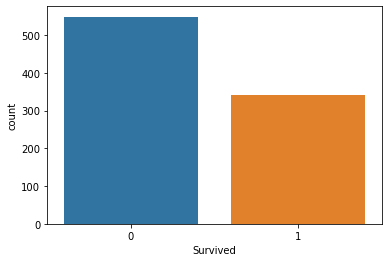

In [7]:
sns.countplot(x="Survived",data=train_df)

#### Visualizing data

In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

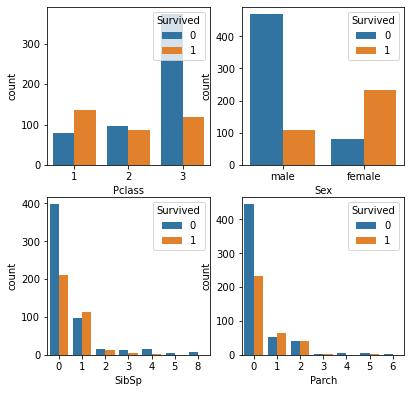

In [9]:
cols=["Pclass","Sex","SibSp","Parch"]

n_rows=2
n_cols=2

fig,axs= plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        
        i=r*n_cols + c
        ax= axs[r][c]
        sns.countplot(x=cols[i],hue="Survived",ax=ax,data=train_df)
        ax.legend(title="Survived",loc="upper right")
        

<AxesSubplot:xlabel='Embarked', ylabel='count'>

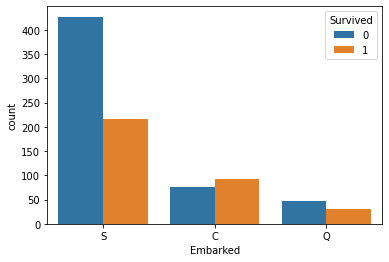

In [10]:
sns.countplot(x="Embarked",hue="Survived",data=train_df)

In [11]:
train_df.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### Survival rate of female is more than that of male

In [12]:
train_df.pivot_table("Survived",index="Sex",columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

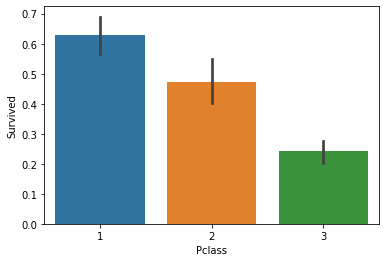

In [13]:
sns.barplot(x="Pclass",y="Survived",data=train_df)

#### The minimum age passenger on the ship is 0.42 yrs & maximum age is 80 yrs
Dividing the age into two categories 
1) 0-18 : Children  
2) 18-80 : Adult

In [14]:
age=pd.cut(train_df["Age"],[0,18,80])
train_df.pivot_table("Survived",index=["Sex",age],columns="Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

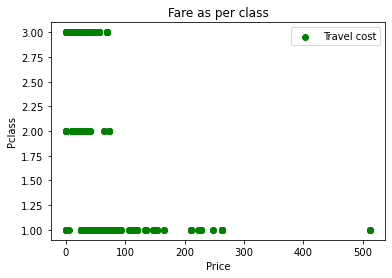

In [15]:
plt.scatter(x="Fare", y="Pclass",data=train_df, color="green",label="Travel cost")
plt.ylabel("Pclass")
plt.xlabel("Price")
plt.title("Fare as per class")
plt.legend()
plt.show()

#### Checking for null values 

In [16]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Concatenating train and test dataset for data cleaning 

In [18]:
titanic= pd.concat([train_df, test_df], ignore_index= True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
titanic.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### Dropping non-relevant data from dataset  
1)PassengerID, Name, Ticket number didn't matter in the survival of a passenger  
2)Out of 1309 values 1014 values are null in Cabin

In [20]:
titanic= titanic.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
titanic= titanic.dropna(subset=["Survived","Age","Fare","Embarked"])

In [21]:
titanic.shape

(712, 8)

In [22]:
titanic.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         6
Parch         7
Fare        219
Embarked      3
dtype: int64

In [23]:
print(titanic["SibSp"].unique())
print(titanic["Parch"].unique())

[1 0 3 4 2 5]
[0 1 2 5 3 4 6]


In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    float64
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 50.1+ KB


#### Checking the unique values of 'object' dtype

In [25]:
print(titanic["Sex"].unique())
print(titanic["Embarked"].unique())

['male' 'female']
['S' 'C' 'Q']


#### Converting non-numeric data into numeric

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)

print(titanic["Sex"].unique())
print(titanic["Embarked"].unique())

[1 0]
[2 0 1]


In [27]:
titanic["Survived"]= titanic["Survived"].astype(int)
print(titanic.dtypes)

Survived      int32
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object


#### Splitting the data into X and Y (X:Independent, Y:Dependent) and later into Train and Test ( X_train, Y_train, X_test, Y_test) with 80:20 ratio

In [28]:
X= titanic.iloc[:,1:8].values
Y= titanic.iloc[:,0].values
print(X.shape, Y.shape)

(712, 7) (712,)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size= 0.2, random_state=0)

In [30]:
print(X_train.shape, X_test.shape)

(569, 7) (143, 7)


In [31]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

#### Finding the best-fit model for out data !!

In [32]:
def models(X_train,Y_train):
    
    #logistic regression
    from sklearn.linear_model import LogisticRegression
    log= LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #knearest
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5, metric= "minkowski", p=2)
    knn.fit(X_train,Y_train)
    
    #svm model
    from sklearn.svm import SVC
    svc_linear= SVC(kernel= "linear", random_state=0)
    svc_linear.fit(X_train, Y_train)
    
    from sklearn.svm import SVC
    svc_rbf= SVC(kernel= "rbf", random_state= 0)
    svc_rbf.fit(X_train,Y_train)
    
    #naive_bayes
    from sklearn.naive_bayes import GaussianNB
    gauss= GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #random forest
    from sklearn.ensemble import RandomForestClassifier
    forest= RandomForestClassifier(n_estimators= 10,criterion= "entropy",random_state=0)
    forest.fit(X_train,Y_train)
    
    #decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree= DecisionTreeClassifier(criterion="entropy",random_state=0)
    tree.fit(X_train,Y_train)
    
    print("[0]Logistic Regression Accuracy:",log.score(X_train, Y_train))
    print("[1]KNN Accuracy:",knn.score(X_train, Y_train))
    print("[2]SVM Linear Classifier Accuracy:",svc_linear.score(X_train, Y_train))
    print("[3]SVM RBF Classifier:",svc_rbf.score(X_train,Y_train))
    print("[4]Gaussian Naive Bayes Accuracy:",gauss.score(X_train,Y_train))
    print("[5]Random Forest Classifier Accuracy:",forest.score(X_train,Y_train))
    print("[6]Decision Tree Classifier Accuracy:",tree.score(X_train,Y_train))
    
    return log, knn, svc_linear, svc_rbf, gauss, forest, tree
    
   

In [33]:
# training and storing models
model= models(X_train, Y_train)

[0]Logistic Regression Accuracy: 0.7978910369068541
[1]KNN Accuracy: 0.8664323374340949
[2]SVM Linear Classifier Accuracy: 0.7768014059753954
[3]SVM RBF Classifier: 0.8506151142355008
[4]Gaussian Naive Bayes Accuracy: 0.8031634446397188
[5]Random Forest Classifier Accuracy: 0.9753954305799648
[6]Decision Tree Classifier Accuracy: 0.9929701230228472


In [34]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm=confusion_matrix(Y_test, model[i].predict(X_test))
    TN,FP,FN,TP= confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    test_score= (TP+TN)/(TP+TN+FN+FP)
    print(cm)
    print("Model[{}] Testing Accuracy= '{}'".format(i,test_score))
    print()

[[73  9]
 [18 43]]
Model[0] Testing Accuracy= '0.8111888111888111'

[[71 11]
 [20 41]]
Model[1] Testing Accuracy= '0.7832167832167832'

[[70 12]
 [18 43]]
Model[2] Testing Accuracy= '0.7902097902097902'

[[75  7]
 [22 39]]
Model[3] Testing Accuracy= '0.7972027972027972'

[[69 13]
 [23 38]]
Model[4] Testing Accuracy= '0.7482517482517482'

[[67 15]
 [13 48]]
Model[5] Testing Accuracy= '0.8041958041958042'

[[60 22]
 [10 51]]
Model[6] Testing Accuracy= '0.7762237762237763'



#### Picking "Random Forest Classifier" as it gives approx 97% accuracy with training data and 80% with testing data

In [35]:
forest= model[5]
importances=pd.DataFrame({"feature":titanic.iloc[:,1:8].columns,"importance":np.round(forest.feature_importances_,3)})
importances=importances.sort_values("importance",ascending=False).set_index("feature")
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


<AxesSubplot:xlabel='feature'>

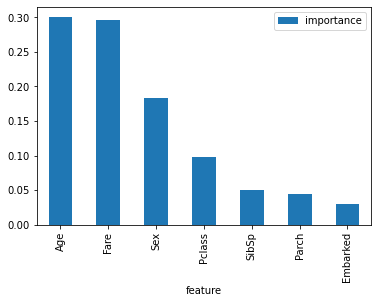

In [36]:
importances.plot.bar()

0 : Didn;t survive  
1 : Survived

In [37]:
pred= model[5].predict(X_test)
print(pred)
print()
print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


#### Predicting whether a passenger would have survived or not  
Inputs= Age, Fare, Sex, Pclass, Sibsp, Parch, Embarked  
Age: 0-80  
Fare: minimum 0  
Sex: male 1; female 0  
Pclass: 1, 2, 3   
Sibsp: 0-5  
Parch: 0-6  
Embarked: S-2; C-0; Q-1


In [38]:
survival=[[30,0,0,1,0,0,1]]
pred=model[5].predict(survival)
print(pred)

if pred==0:
    print("Sorry, you didn't")
else:
    print("Nice! you survived")

[0]
Sorry, you didn't
